<a href="https://colab.research.google.com/github/yqz5514/Reg-Stats-Coding-Project/blob/main/ER_Rules_Plot_R_demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instruction



This is the notebook for generating ES_rules_published_presidential_year dataset.

---

There are three parts in this notebook:

1.   Download required files
     

*   All required files will be downloaded in this section


2.   Install and Load packages


*   All required library will be installed in this section.


3.   Plot









## Download required files

In this section, all the files will be saved at notebook session storage (directory: /content) for the current session only. Three files will be download in this section for ploting.

- Dataset (upload the .csv file to notebook session storage by selecting the file option on the sidebar, then select upload option. )
- Font style
- Logo

In [1]:
#@title install R package for downloading files
install.packages("R.utils")
library("R.utils")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [2]:
# download ES rules published data
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/ES_rules_published_presidential_year_(with_party)_2023-03-28.csv",
              "ES_rules_published_presidential_year_(with_party)_2023-03-28.csv.gz")
gunzip('ES_rules_published_presidential_year_(with_party)_2023-03-28.csv.gz')


In [3]:
# Dowloading logo and font style for reg stats plots
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/gw_ci_rsc_2cs_pos.png",
              "gw_ci_rsc_2cs_pos.png.gz")
download.file("https://github.com/yqz5514/Reg-Stats-Coding-Project/raw/main/a-avenir-next-lt-pro.otf",
              "a-avenir-next-lt-pro.otf.gz")
gunzip('gw_ci_rsc_2cs_pos.png.gz')
gunzip('a-avenir-next-lt-pro.otf.gz')

##Install and load packages

In this section, all required packages and library will be installed.

In [5]:
#@title install&load packages
install.packages('png') # use for load png file
install.packages('showtext') #directly works on .OTF fonts, for custom font on ggplot
install.packages('ggpattern') # for plot pattern
# load packages
library(ggplot2)
library(showtext)
library(png)
library(ggpattern)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’, ‘sf’, ‘gridpattern’




In [7]:
#@title load custome font to system
font_add("avenir_lt_pro","a-avenir-next-lt-pro.otf")
showtext_auto()

## Plot


 - In this section, the plot will be
generated, and a pdf version of plot will be automatically saved to notebook session storage.
 - Download the plot.pdf : select file option on the left sidebar, double click the plot.pdf file for download.

In [8]:
#@title read and get png file from local
get_png <- function(filename) {
  grid::rasterGrob(png::readPNG(filename),interpolate = TRUE)
}

l <- get_png("gw_ci_rsc_2cs_pos.png")

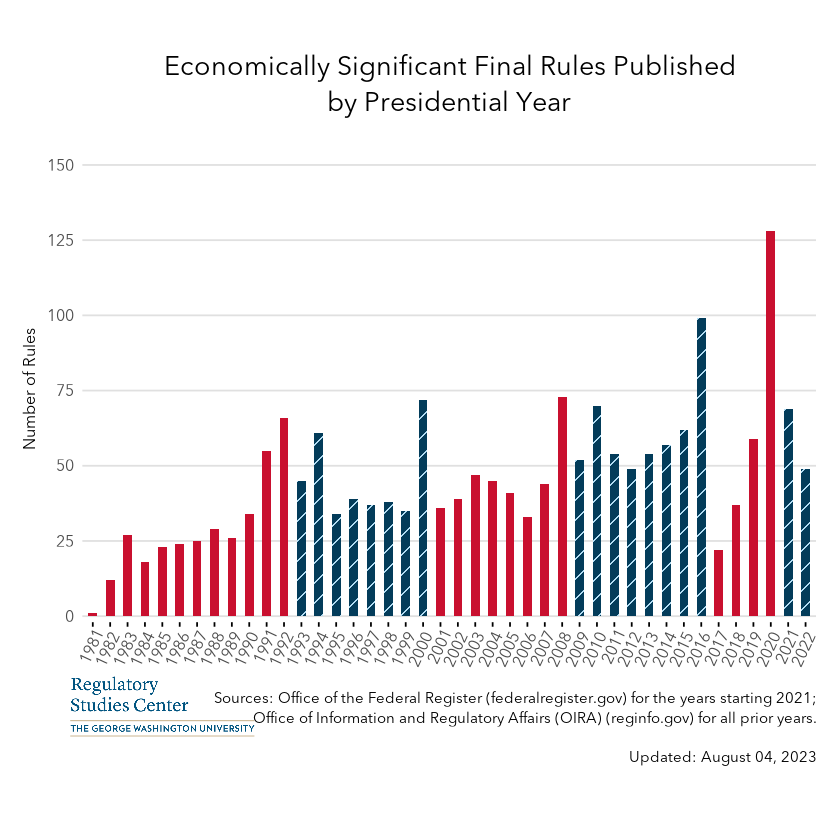

In [25]:
# generate plot


# data : Economically Significant Final Rules Published by Presidential Year
# generate bar1
current_date <- format(Sys.Date(), "%B %d, %Y")

caption_text <- paste("Sources: Office of the Federal Register (federalregister.gov) for the years starting 2021;\n       Office of Information and Regulatory Affairs (OIRA) (reginfo.gov) for all prior years.\n\nUpdated:", current_date)
bar1 <-
  ggplot(sig, aes(x = year, y = econ, fill= party,pattern = party)) +
  geom_bar_pattern(stat = "identity", width = 0.5,
                   pattern_color = NA,
                    pattern_fill = "#B2DDF4",
                    pattern_angle = 45,
                    pattern_density = 0.1,
                    pattern_spacing = 0.03,
                   # pattern_key_scale_factor = 1
                   ) +
  scale_fill_manual(values = c("#033C5A","#C9102F")) +
  scale_pattern_manual(values = c(Democratic = "stripe", Republican = "none")) +
  theme_minimal() +
  ggtitle("Economically Significant Final Rules Published \nby Presidential Year") +
  ylab("Number of Rules") +
  xlab("") +
  scale_y_continuous(breaks = seq(0, max(sig$econ) + 25, by = 25), expand = c(0, 0), limits = c(-2, max(sig$econ) + 25)) +
  # scale_y_continuous()
  annotation_custom(l, xmin = -10, xmax = 20, ymin = -20, ymax = -40) + # for logo
  coord_cartesian(clip = "off") +
  theme(
    plot.title = element_text(hjust = 0.5, vjust=-2, margin = margin(b = 40, unit = "pt"), size=20),
    axis.text.x = element_text(angle = 65, hjust = 1, vjust = 1,size=12),
    legend.position = "none",
    panel.grid.major.x = element_blank(),
    axis.text.y = element_text(size=12),
    axis.title.y = element_text(size = 12, angle = 90, vjust = 1),
    panel.grid.major.y = element_line(color = "#E0E0E0", linetype = "solid"),
    panel.grid.minor = element_blank(),
    text =element_text(family = "avenir_lt_pro"),
    plot.caption = element_text(hjust = 1, margin = margin(t = 0, l = 6, unit = "pt"),size=11),
    plot.margin = unit(c(1, 1, 3, 1), "lines"),
    axis.ticks.x = element_line()
    )+
  labs(caption = caption_text)
# +
#   annotate(
#     geom = "segment",
#     x = sig$year,
#     xend = sig$year,
#     y = 0,
#     yend = -2,
#     color = "grey")

bar1

ggsave("#B2DDF4.pdf",device = cairo_pdf, width = 12.5, height = 9, dpi = 300)
